In [9]:
#import the necessary libraries
import tensorflow as tf
print(tf.__version__)
import warnings
warnings.filterwarnings('ignore')

2.4.1


In [10]:
# IMDB dataset for sentiment classification with text and labels 
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [11]:
# Split data into train and test 
train_data, test_data = imdb['train'], imdb['test']

In [12]:
# Specify the buffer size from which texts are replaced for shuffling the text 

buffer_size = 10000
batch_size = 64
train_data = train_data.shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size,  tf.compat.v1.data.get_output_shapes(test_data))

In [13]:
tokenizer = info.features['text'].encoder

In [14]:
print(tokenizer.subwords[:100])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing']


In [15]:
sample_string = 'Tensorflow, from basics to mastery'


tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))
original_string = tokenizer.decode(tokenized_string)
print('Original string is {}'.format(original_string)) 

Tokenized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
Original string is Tensorflow, from basics to mastery


In [16]:
for ts in tokenized_string:
    print('{}-----> {}'.format(ts,tokenizer.decode([ts])))

6307-----> Ten
2327-----> sor
2934-----> flow
2-----> , 
48-----> from 
4249-----> basi
4429-----> cs 
7-----> to 
2652-----> master
8050-----> y


In [17]:
tokenize = tokenizer.encode(sample_string)
tokenize

[6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]

In [18]:
embedding_dim=64
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 10

model_1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs = num_epochs, validation_data = test_data)

Epoch 1/10
391/391 [==============================] - 14s 32ms/step - loss: 0.6882 - accuracy: 0.5585 - val_loss: 0.6224 - val_accuracy: 0.7453
Epoch 2/10
391/391 [==============================] - 13s 34ms/step - loss: 0.5609 - accuracy: 0.7841 - val_loss: 0.4429 - val_accuracy: 0.8314
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 0.3896 - accuracy: 0.8642 - val_loss: 0.3609 - val_accuracy: 0.8627
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.3086 - accuracy: 0.8925 - val_loss: 0.3277 - val_accuracy: 0.8738
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2619 - accuracy: 0.9085 - val_loss: 0.3140 - val_accuracy: 0.8761
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2394 - accuracy: 0.9162 - val_loss: 0.3208 - val_accuracy: 0.8679
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2134 - accuracy: 0.9254 - val_loss: 0.3188 - val_accuracy:

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

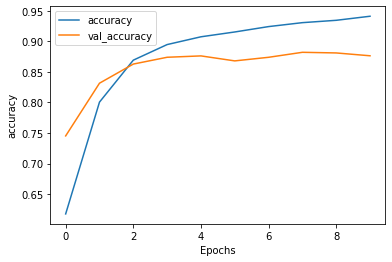

In [24]:
plot_graphs(history_1, 'accuracy')

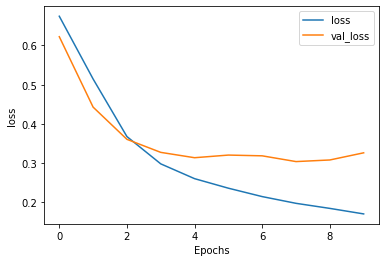

In [25]:
plot_graphs(history_1,'loss')

In [30]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(train_data, epochs = num_epochs, validation_data = test_data)

Epoch 1/10
391/391 [==============================] - 585s 1s/step - loss: 0.6228 - accuracy: 0.6430 - val_loss: 0.4222 - val_accuracy: 0.8194
Epoch 2/10
391/391 [==============================] - 1595s 4s/step - loss: 0.3733 - accuracy: 0.8440 - val_loss: 0.4096 - val_accuracy: 0.8311
Epoch 3/10
391/391 [==============================] - 595s 2s/step - loss: 0.3134 - accuracy: 0.8823 - val_loss: 0.4381 - val_accuracy: 0.8236
Epoch 4/10
391/391 [==============================] - 612s 2s/step - loss: 0.3396 - accuracy: 0.8671 - val_loss: 0.5956 - val_accuracy: 0.6706
Epoch 5/10
391/391 [==============================] - 727s 2s/step - loss: 0.3785 - accuracy: 0.8373 - val_loss: 0.4762 - val_accuracy: 0.7843
Epoch 6/10
391/391 [==============================] - 540s 1s/step - loss: 0.2366 - accuracy: 0.9103 - val_loss: 0.4546 - val_accuracy: 0.8289
Epoch 7/10
391/391 [==============================] - 580s 1s/step - loss: 0.1807 - accuracy: 0.9375 - val_loss: 0.4955 - val_accuracy: 0.799

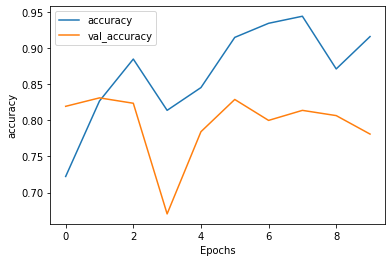

In [39]:
plot_graphs(history_2, 'accuracy')

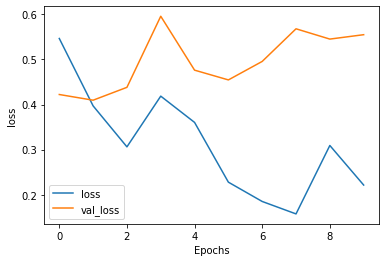

In [40]:
plot_graphs(history_2, 'loss')

In [35]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [36]:
model_3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs = num_epochs, validation_data = test_data)

Epoch 1/10
391/391 [==============================] - 147s 374ms/step - loss: 0.5846 - accuracy: 0.6455 - val_loss: 0.2819 - val_accuracy: 0.8816
Epoch 2/10
391/391 [==============================] - 128s 327ms/step - loss: 0.2153 - accuracy: 0.9184 - val_loss: 0.2541 - val_accuracy: 0.8950
Epoch 3/10
391/391 [==============================] - 173s 442ms/step - loss: 0.0876 - accuracy: 0.9766 - val_loss: 0.2946 - val_accuracy: 0.8929
Epoch 4/10
391/391 [==============================] - 193s 494ms/step - loss: 0.0225 - accuracy: 0.9964 - val_loss: 0.3350 - val_accuracy: 0.8937
Epoch 5/10
391/391 [==============================] - 154s 393ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3640 - val_accuracy: 0.8944
Epoch 6/10
391/391 [==============================] - 135s 345ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3911 - val_accuracy: 0.8941
Epoch 7/10
391/391 [==============================] - 122s 313ms/step - loss: 7.8458e-04 - accuracy: 1.0000 - val_loss: 0.41

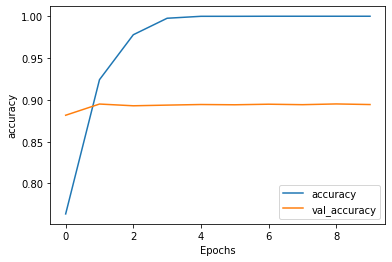

In [42]:
plot_graphs(history_3, 'accuracy')

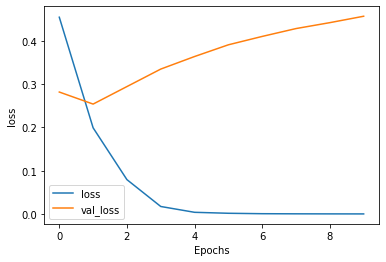

In [41]:
plot_graphs(history_3, 'loss')